In [ ]:
#step 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#step 2
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import json
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.sequence import pad_sequences


def load_data(data_dir):
    emg_data_list = []
    audio_data_list = []
    info_list = []

    for i in range(694):
        emg_file_path = os.path.join(data_dir, f"{i}_emg.npy")
        audio_file_path = os.path.join(data_dir, f"{i}_audio.flac")
        info_file_path = os.path.join(data_dir, f"{i}_info.json")

        if all(os.path.exists(file_path) for file_path in [emg_file_path, audio_file_path, info_file_path]):
            emg_data_list.append(np.load(emg_file_path))
            audio_data_list.append(librosa.load(audio_file_path, sr=None)[0])
            with open(info_file_path) as f:
                info_list.append(json.load(f))
        else:
            print(f"Files for sample {i} not found")

    return emg_data_list, audio_data_list, info_list

In [ ]:
#step 3
dir_path = '/content/drive/MyDrive/Colab_Notebooks/emg_data/closed_vocab/silent/5-19_silent'
emg_data, audio_data, info_data = load_data(dir_path)


In [ ]:
#step 4
# Pad sequences to the same length
max_length = max(max(len(x) for x in emg_data), max(len(y) for y in audio_data))
X = pad_sequences(emg_data, maxlen=max_length, dtype='float32', padding='post')
y = pad_sequences(audio_data, maxlen=max_length, dtype='float32', padding='post')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# Flatten the data for the dense network (not ideal for sequences)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

In [ ]:
#step 5

model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),  # Increase the number of neurons
    BatchNormalization(),  # Add batch normalization
    Activation('relu'),  # Separate activation layer
    Dropout(0.3),  # Increase dropout rate

    Dense(256),  # Increase the number of neurons
    BatchNormalization(),  # Add batch normalization
    Activation('relu'),  # Separate activation layer
    Dropout(0.3),  # Increase dropout rate

    Dense(128),  # Intermediate layer
    BatchNormalization(),  # Add batch normalization
    Activation('relu'),  # Separate activation layer
    Dropout(0.3),  # Increase dropout rate

    Dense(128),  # Intermediate layer
    BatchNormalization(),  # Add batch normalization
    Activation('relu'),  # Separate activation layer
    Dropout(0.3),  # Increase dropout rate

    Dense(64),  # Intermediate layer
    BatchNormalization(),  # Add batch normalization
    Activation('relu'),  # Separate activation layer
    Dropout(0.3),  # Increase dropout rate

    Dense(y_train.shape[1])  # output layer, shape should match y_train
])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
#step 6
import matplotlib.pyplot as plt

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
18/18 [==============================] - 60s 3s/step - loss: 8.2942e-04 - accuracy: 0.0000e+00 - val_loss: 7.7254e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
18/18 [==============================] - 55s 3s/step - loss: 3.6311e-04 - accuracy: 0.0000e+00 - val_loss: 1.0031e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
18/18 [==============================] - 54s 3s/step - loss: 1.4419e-04 - accuracy: 0.0000e+00 - val_loss: 2.8279e-05 - val_accuracy: 0.0000e+00
Epoch 4/20
18/18 [==============================] - 57s 3s/step - loss: 6.1660e-05 - accuracy: 0.0000e+00 - val_loss: 1.1525e-05 - val_accuracy: 0.0000e+00
Epoch 5/20
18/18 [==============================] - 53s 3s/step - loss: 3.2285e-05 - accuracy: 0.0018 - val_loss: 6.6087e-06 - val_accuracy: 0.0000e+00
Epoch 6/20
18/18 [==============================] - 56s 3s/step - loss: 2.0060e-05 - accuracy: 0.0000e+00 - val_loss: 3.9668e-06 - val_accuracy: 0.0000e+00
Epoch 7/20
18/18 [==============================] - 55s 3s/step - lo

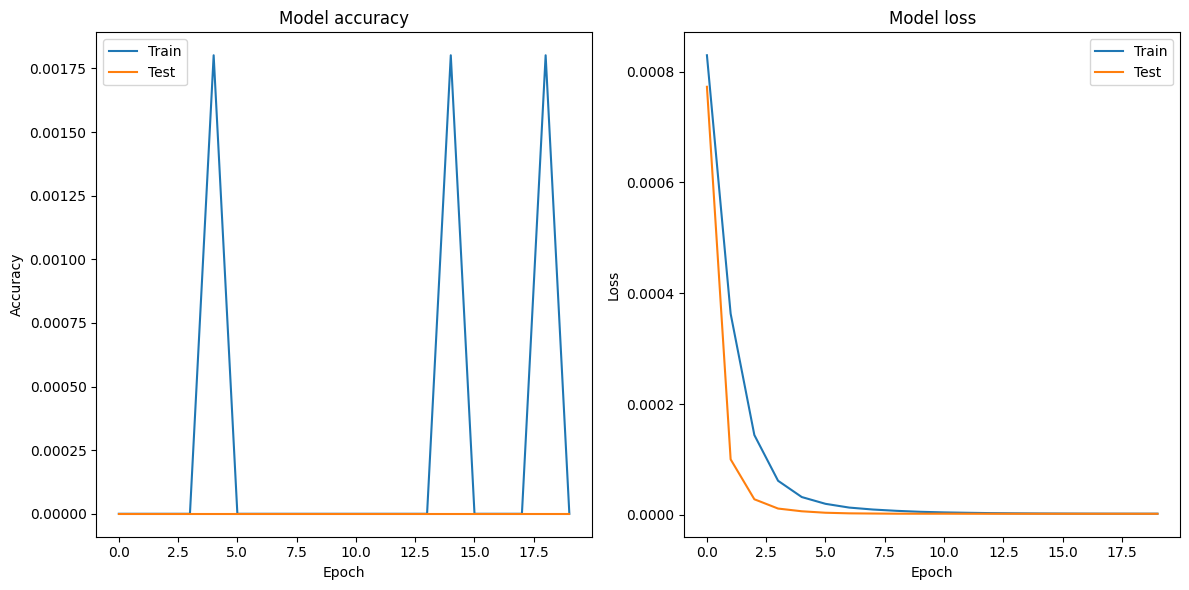

In [ ]:
plt.figure(figsize=(12, 6))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model accuracy')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model loss')

plt.tight_layout()
plt.show()

In [ ]:
#step 7
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')


model.save('/content/drive/MyDrive/Colab_Notebooks/model1.h5')

5/5 [==============================] - 3s 418ms/step - loss: 2.0699e-06 - accuracy: 0.0000e+00
Mean Squared Error: [2.0699246761068935e-06, 0.0]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
